# Como fazer uma ANOVA de comparação de médias no python? 

Quando queremos comparar especificações entre dois itens ou mais itens (matérias-primas, produtos, tratamentos e etc.) podemos utilizar a ANOVA.

Anova significa Analysis Of Variance e a utilizando você poderá verificar se os itens que estão sendo comparados possuem médias estatisticamente semelhantes ou não.

Como padrão, ela utiliza as seguintes hipóteses: 

- H0: Médias são semelhantes entre os itens de comparação.

- HA: Médias não são semelhantes estatisticamente.

 

E basicamente, vamos utilizar o p-valor para aceita-la ou rejeitá-la:

 

P-valor ≥ 0,05: Aceita-se a hipótese H0, ou seja, os itens possuem médias ou variâncias semelhantes entre si.

P-valor < 0,05: Rejeita-se a hipótese H0, ou seja, os itens possuem médias ou variâncias não são semelhantes entre si (itens são distintos).

 

Abaixo há o exemplo do tempo de downloads para dois provedores distintos (Tabela 1).

Então nosso objetivo aqui é verificar se há diferenças significativas entre o tempo de download entre um e outro provedor afim de escolher um provedor melhor.

Para isso, foram realizados vários downloads de forma aleatória

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import matplotlib.pyplot as plt


In [40]:
df_origem = pd.read_csv("datasets/provedores.csv", delimiter=";", encoding='cp1252', header=0)

In [41]:
df = df_origem.copy()

In [42]:
df_origem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Medicao   15 non-null     int64  
 1   Provedor  15 non-null     object 
 2   Tempo     15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 364.0+ bytes


In [43]:
df_origem

,Medicao,Provedor,Tempo
0,1,A,17.2
1,2,A,16.9
2,3,A,16.8
3,4,A,17.2
4,5,A,17.3
5,6,A,17.1
6,7,A,17.2
7,8,B,17.2
8,9,B,16.9
9,10,B,16.8


ANOVA / ANOVA > Um fator (One-way em inglês)

Text(0.5, 1.0, 'Grafico de Intervalos de tempo versus provedor')

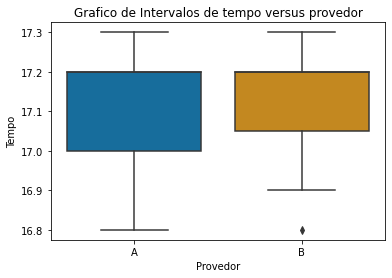

In [44]:
sns.boxplot(x='Provedor', y='Tempo',
                 data=df,
                 palette="colorblind").set_title("Grafico de Intervalos de tempo versus provedor")

In [45]:
pd.get_dummies(df['Provedor'])

,A,B
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [46]:
np.random.seed(1234)

In [47]:
dfAnovaOW=pd.DataFrame({'ProvedorA':df[df['Provedor']=='A']['Tempo'],
                 'ProvedorB':df[df['Provedor']=='B']['Tempo']
                 })

In [48]:
dfAnovaOW.describe()

,ProvedorA,ProvedorB
count,7.000000,8.000000
mean,17.100000,17.112500
std,0.182574,0.172689
min,16.800000,16.800000
25%,17.000000,17.050000
50%,17.200000,17.200000
75%,17.200000,17.200000
max,17.300000,17.300000


In [54]:
dataNew=pd.DataFrame({'ProvedorA':random.sample(list(df['Tempo'][df['Provedor']=='A']),7),
'ProvedorB':random.sample(list(df['Tempo'][df['Provedor']=='B']),7) })

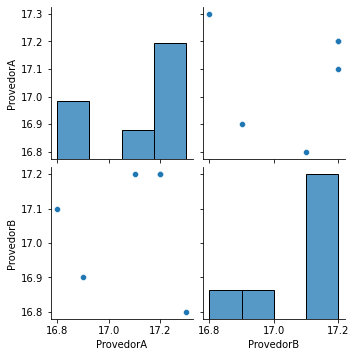

In [55]:
sns.pairplot(dataNew)

In [57]:
dataNew['ProvedorA'],fitted_lambda = stats.boxcox(dataNew['ProvedorA'])
dataNew['ProvedorB'],fitted_lambda = stats.boxcox(dataNew['ProvedorB'])

C:\python\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\python\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ProvedorB', ylabel='Density'>

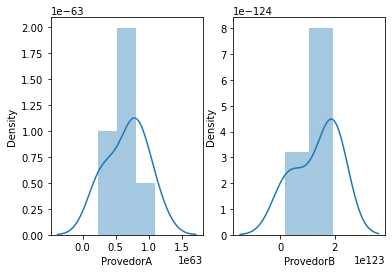

In [64]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(dataNew['ProvedorA'], ax=axs[0])
sns.distplot(dataNew['ProvedorB'], ax=axs[1])

In [62]:
F, p = stats.f_oneway(dataNew['ProvedorA'], dataNew['ProvedorB'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=19.221, p=0.001


# Método 
- Hípotese nula $H0$:          Todas as médias são iguais   
- Hípotese alternativa $HA$:   Nem todas as médias são iguais   
- Nível de significância: $\alpha = 0,05$   

> Assumiu-se igualdade de vâriancias para a análise

# Informações dos Fatores


In [76]:
print(f"Níveis: {df['Provedor'].nunique()}")
print(f"Valores: {df['Provedor'].unique()}")

Níveis: 2
Valores: ['A' 'B']


In [81]:
df.groupby("Provedor")['Tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
Provedor,,,,,,,,
A,7.0,17.1000,0.182574,16.8,17.00,17.2,17.2,17.3
B,8.0,17.1125,0.172689,16.8,17.05,17.2,17.2,17.3


# Sumário do Modelo


# Médias